###Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Reading the dataset, printing the head and number of rows present

In [7]:
df = pd.read_csv("Book1.csv")
print(df.head)
print(f"The number of rows are: {df.shape[0]}")

<bound method NDFrame.head of      YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]>
The number of rows are: 117


###Printing out descriptive statistics

In [8]:
column_name = 'Rainfall in June'

# Use the describe method on the specific column
column_stats = df[column_name].describe()

# Display the descriptive statistics for the specified column
print(f"Descriptive Statistics for {column_name}:")
print(column_stats)

Descriptive Statistics for Rainfall in June:
count    113.000000
mean      72.957522
std       35.968989
min       17.700000
25%       48.500000
50%       69.900000
75%       90.600000
max      161.000000
Name: Rainfall in June, dtype: float64


###Replacing the empty values with the median

In [9]:
median_rainfall = df['Rainfall in June'].median()
df['Rainfall in June'].fillna(median_rainfall, inplace=True)
print(df)
median_rainfall

     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]


69.9

In [10]:
#Checking if the rows have really been updated
df['Rainfall in June'][103]

69.9

###Removing all the duplicates

In [11]:
df.drop_duplicates(inplace=True)
df

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


###Plotting the histogram and telling whether right or left skewed

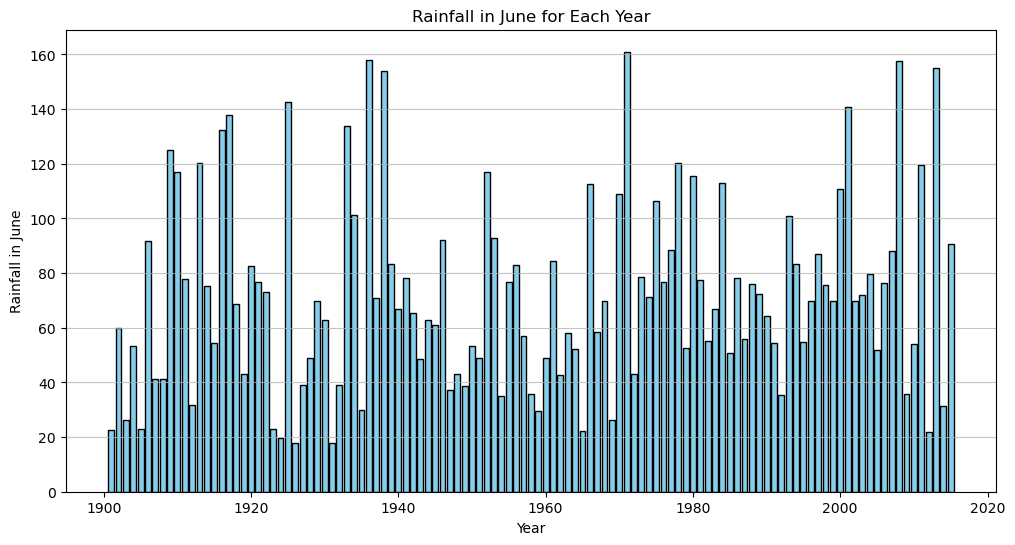

Mean: 72.21652173913043
Median: 69.9
The distribution is skewed to the right.


In [12]:
# Plot a bar plot for the 'Rainfall in June' column against 'YEAR'
plt.figure(figsize=(12, 6))
plt.bar(df['YEAR'], df['Rainfall in June'], color='skyblue', edgecolor='black')
plt.title('Rainfall in June for Each Year')
plt.xlabel('Year')
plt.ylabel('Rainfall in June')
plt.grid(axis='y', alpha=0.75)

# Display the bar plot
plt.show()

# Compare the Mean with Median
mean_value = df['Rainfall in June'].mean()
median_value = df['Rainfall in June'].median()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

# Determine skewness based on the comparison of mean and median
if mean_value > median_value:
    print("The distribution is skewed to the right.")
elif mean_value < median_value:
    print("The distribution is skewed to the left.")
else:
    print("The distribution is symmetric.")

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
rainfall_data = df[['Rainfall in June']]
scaler_standard = StandardScaler()
rainfall_standard_scaled = scaler_standard.fit_transform(rainfall_data)

# Min-Max Scaling using MinMaxScaler
scaler_minmax = MinMaxScaler()
rainfall_minmax_scaled = scaler_minmax.fit_transform(rainfall_data)

# Display the differences in range
print("Standard Scaling Range:")
print(f"Min: {rainfall_standard_scaled.min()}")
print(f"Max: {rainfall_standard_scaled.max()}\n")

print("Min-Max Scaling Range:")
print(f"Min: {rainfall_minmax_scaled.min()}")
print(f"Max: {rainfall_minmax_scaled.max()}")

Standard Scaling Range:
Min: -1.5610970386628225
Max: 2.5423416713642912

Min-Max Scaling Range:
Min: 0.0
Max: 0.9999999999999999


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
X = df[['YEAR']]
y = df['Rainfall in June']

# Split the data into training and testing sets (80-20 rule)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE

# Report the evaluation metrics
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")

Mean Absolute Error (MAE) of the test data: 32.104436059010254
Mean Squared Error (MSE) of the test data: 1565.2372526417516
Root Mean Squared Error (RMSE) of the test data: 39.56307941303042


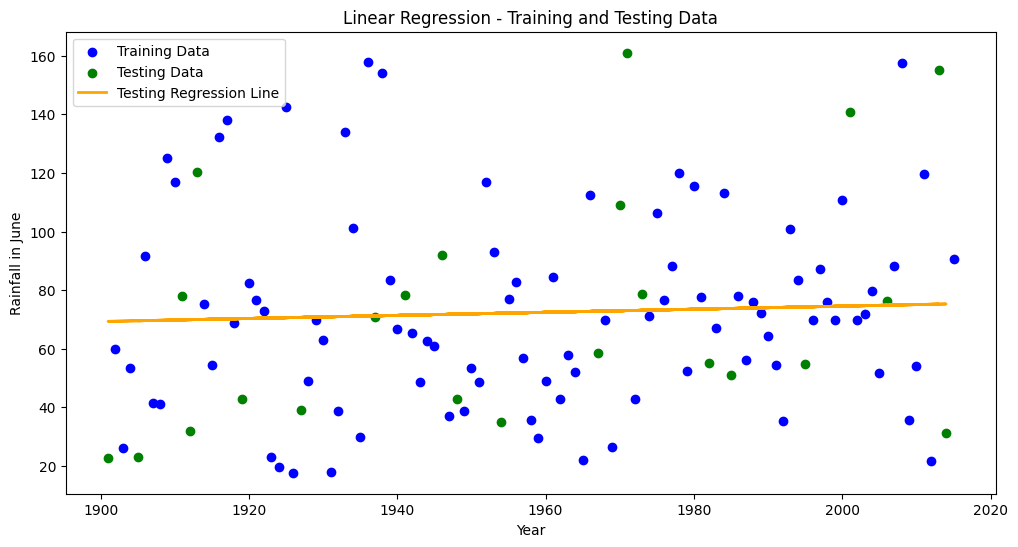

In [54]:
# Predict on both training and test sets
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.scatter(x_train, y_train, color='blue', label='Training Data')

# Scatter plot for test data
plt.scatter(x_test, y_test, color='green', label='Testing Data')

# Regression line for test data
plt.plot(x_test, y_pred_test, color='orange', linewidth=2, label='Testing Regression Line')

plt.title('Linear Regression - Training and Testing Data')
plt.xlabel('Year')
plt.ylabel('Rainfall in June')
plt.legend()
plt.show()

In [19]:
print("With 80-20 split:")
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")
# Split the data into training and testing sets (70-30 rule)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Linear Regression model
model = LinearRegression().fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE

# Report the evaluation metrics
print("\nWith 70-30 split:")
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")

With 80-20 split:
Mean Absolute Error (MAE) of the test data: 32.104436059010254
Mean Squared Error (MSE) of the test data: 1565.2372526417516
Root Mean Squared Error (RMSE) of the test data: 39.56307941303042

With 70-30 split:
Mean Absolute Error (MAE) of the test data: 32.20619655694001
Mean Squared Error (MSE) of the test data: 1485.296189643908
Root Mean Squared Error (RMSE) of the test data: 38.53954059980357
